<a href="https://colab.research.google.com/github/Onabanjomicheal/Cargo-Ship-Dashboard/blob/main/chip_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/global_cargo_ship_project/Cleaned_ships_data.csv')
df.head()


,Company_Name,ship_name,built_year,gt,dwt,length,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,MSC LORETO,Container Ship,2023,236184,240000,399,60
2,MSC FEBE,Container Ship,2019,232618,228149,400,62
3,MSC ARINA,Container Ship,2019,228741,228111,400,61
4,EVER GOVERN,Container Ship,2019,219688,198937,400,59


In [ ]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  200 non-null    object
 1   ship_name     200 non-null    object
 2   built_year    200 non-null    int64 
 3   gt            200 non-null    int64 
 4   dwt           200 non-null    int64 
 5   length        200 non-null    int64 
 6   width         200 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.1+ KB


Index(['Company_Name', 'ship_name', 'built_year', 'gt', 'dwt', 'length',
       'width'],
      dtype='object')

In [ ]:
port_df = pd.read_csv('/content/drive/MyDrive/global_cargo_ship_project/Port_locations.csv')
port_df.head()


,country,port_name,locode
0,Spain,A Coruna,ESLCG
1,Spain,A Coruna,ESLCG
2,Spain,A Coruna,ESLCG
3,Spain,A Coruna,ESLCG
4,Spain,A Coruna,ESLCG


In [ ]:
port_df = pd.read_csv('/content/drive/MyDrive/global_cargo_ship_project/Port_locations.csv')

# Display unique countries in the dataset
unique_countries = port_df['country'].dropna().unique()
print("Total Countries:", len(unique_countries))
print("Countries:\n", unique_countries)


Total Countries: 75
Countries:
 ['Spain' 'Egypt' 'Japan' 'Iceland' 'Qatar' 'Portugal' 'Argentina' 'Canada'
 'Italy' 'China' 'Norway' 'United Kingdom (UK)' 'Iran' 'Russia' 'Greece'
 'Guadeloupe' 'Turkey' 'United States (USA)' 'Germany' 'Netherlands'
 'Malaysia' 'Belgium' 'France' 'Croatia' 'Sweden' 'Mexico'
 'St Vincent & Grenadines' 'Dominican Rep' 'Indonesia' 'Turkmenistan'
 'Equatorial Guinea' 'Chile' 'Vietnam' 'Korea' 'Australia' 'Nicaragua'
 'Puerto Rico' 'United Arab Emirates (UAE)' 'Faeroe Islands' 'Poland'
 'India' 'Bahamas' 'Estonia' 'Montenegro' 'Solomon Islands' 'Brazil'
 'US Minor Outlying Isls' 'Philippines' 'Finland' 'Fiji' 'Haiti'
 'Togolese Rep' 'Jamaica' 'New Zealand' 'Panama' 'Madagascar' 'Nauru'
 'Cuba' 'Isle of Man' 'Mauritius' 'South Africa' 'Angola'
 'Papua New Guinea' 'Denmark' 'Sao Tome & Principe' 'Slovenia' 'Tunisia'
 'Kuwait' 'Aruba' 'Bulgaria' 'Thailand' 'New Caledonia' 'Libya' 'Cyprus'
 'Latvia']


In [ ]:
import pandas as pd
import numpy as np

# Load the ports
port_df = pd.read_csv('/content/drive/MyDrive/global_cargo_ship_project/Port_locations.csv')

# Get unique port names (cleaned)
unique_ports = port_df['port_name'].dropna().unique()

# For simplicity, sample 30 ports to work with
selected_ports = np.random.choice(unique_ports, size=30, replace=False)


In [ ]:
# Select only real numeric features
df_cluster = df[['gt', 'dwt', 'length', 'width', 'built_year']]
df_cluster.head()


,gt,dwt,length,width,built_year
0,499167,394330,489,74,2017
1,236184,240000,399,60,2023
2,232618,228149,400,62,2019
3,228741,228111,400,61,2019
4,219688,198937,400,59,2019


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cluster)

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Add PCA results to the dataframe
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)


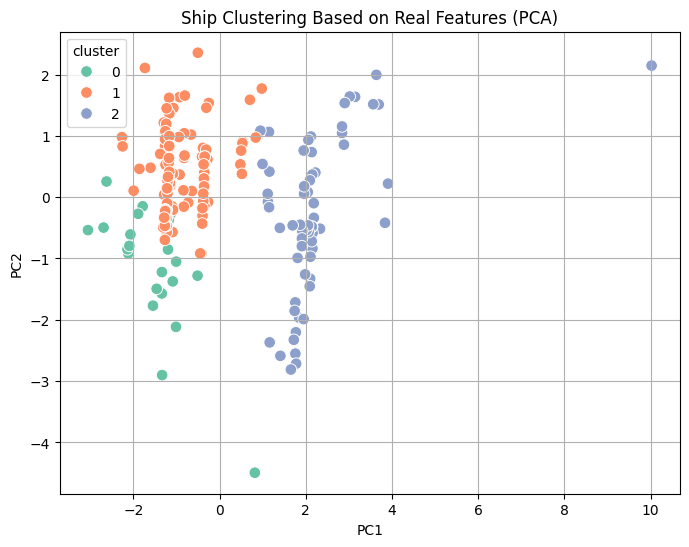

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=70)
plt.title('Ship Clustering Based on Real Features (PCA)')
plt.grid(True)
plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/global_cargo_ship_project/final_clustered_ships.csv', index=False)


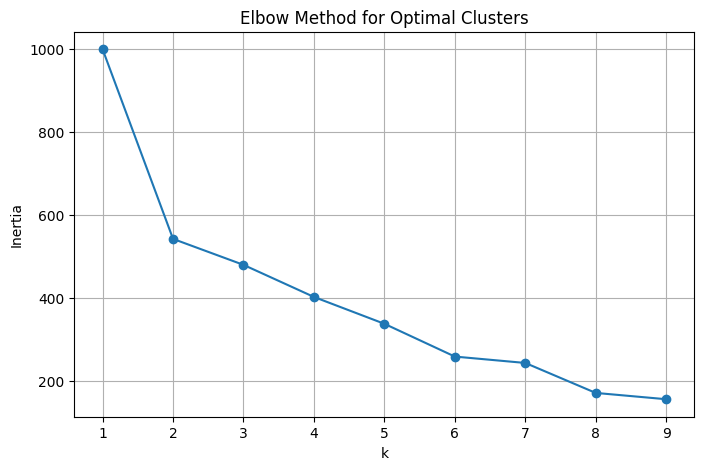

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled, df['cluster'])
print(f"Silhouette Score for k=3: {sil_score:.3f}")


Silhouette Score for k=3: 0.350


In [ ]:
!pip install streamlit pandas seaborn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os # Import the os module to check file existence

st.set_page_config(page_title="Ship Clustering App", layout="wide")
st.title("🚢 Ship Clustering Dashboard")

# Define the full path to the CSV file in Google Drive
CSV_PATH = '/content/drive/MyDrive/global_cargo_ship_project/final_clustered_ships.csv'

# Load clustered dataset
# Add a check to ensure the file exists before attempting to read
if not os.path.exists(CSV_PATH):
    st.error(f"Error: The file '{CSV_PATH}' was not found.")
    st.info("Please ensure your Google Drive is mounted and the file path is correct.")
    st.stop() # Stop the Streamlit app if the file is not found
else:
    try:
        df = pd.read_csv(CSV_PATH)
    except Exception as e:
        st.error(f"Error loading CSV file: {e}")
        st.stop()


# Sidebar
st.sidebar.header("🔍 Filter by Cluster")
selected_clusters = st.sidebar.multiselect("Select Clusters", options=sorted(df['cluster'].unique()), default=sorted(df['cluster'].unique()))

# Filter data
filtered_df = df[df['cluster'].isin(selected_clusters)]

# Cluster Summary
st.subheader("📊 Cluster Summary Statistics")
st.dataframe(filtered_df.groupby('cluster')[['gt', 'dwt', 'length', 'width', 'built_year']].mean().round(1))

# PCA Scatter Plot
st.subheader("📈 PCA Visualization")
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=70)
plt.title("Clusters of Ships (PCA Projection)")
plt.grid(True)
st.pyplot(fig)

# Raw Data
with st.expander("📄 Show Full Data Table"):
    st.dataframe(filtered_df)


Overwriting app.py


In [ ]:
!pip install pyngrok
!npm install -g ngrok # Install ngrok globally

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 44 packages in 6s
⠏
⠏9 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [ ]:
from pyngrok import ngrok
import os

# Terminate any existing ngrok tunnels (important to avoid conflicts)
ngrok.kill()

# Replace "YOUR_NPGROK_AUTH_TOKEN" with your actual ngrok authtoken
NGROK_AUTH_TOKEN = "2yq4aLYzeEatcGwabyXjbyzL2sJ_3SYRH2zXUp1CRxSc3xGPj"
if NGROK_AUTH_TOKEN == "YOUR_NPGROK_AUTH_TOKEN":
    print("WARNING: Please replace 'YOUR_NPGROK_AUTH_TOKEN' with your actual ngrok authtoken from https://dashboard.ngrok.com/get-started/your-authtoken")
else:
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Start Streamlit in the background
# Make sure app.py is updated to correctly load final_clustered_ships.csv from Drive
!streamlit run app.py &>/dev/null&

# Open a ngrok tunnel to Streamlit's default port 8501
public_url = ngrok.connect(8501)
print("Streamlit app is available at:", public_url)

# Keep the cell running to maintain the tunnel
# You might need to explicitly stop this cell if you want to close the tunnel

Streamlit app is available at: NgrokTunnel: "https://d42e-34-150-184-66.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
from google.colab import files
files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>